## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import r2_score
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

### Plot X vs. y

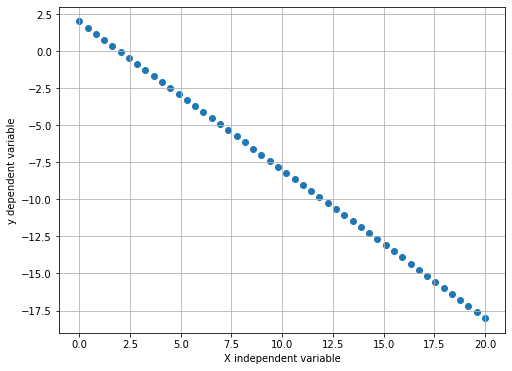

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel('X independent variable')
plt.ylabel('y dependent variable')
plt.grid()
plt.show()

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [6]:
def GD_singleVariable(X, y, learning_rate, max_iterations):
    theta_0 = 0
    theta_1 = 0
    i = 0
    loss = []
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    while i<max_iterations:
        print(f'****************** Iteration {i} *******************\n')

        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        # step2
        h_x = theta_0 + theta_1*X
        y_predict.append(h_x)
        print(f'h(x):{h_x}\n')
        
        # step3
        error_vector = h_x - y
        print(f'Error Vector:\n{error_vector}\n')
        error_norm = np.linalg.norm(error_vector, 2)
        j = error_norm**2 / (2*len(error_vector))
        loss.append(j)
        print(f'j = {j}\n')
                                              
        # step4                                                  
        d_theta_0 = error_vector.sum()/len(error_vector)
        d_theta_1 = (error_vector@X) /len(error_vector)
        Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
        print(f'Gradient Vector :\n {Gradient_Vector}\n')                 
        print(f'Gradient Vector Norm : {Gradient_Vector_Norm}\n')
        if Gradient_Vector_Norm < 0.001:                             
            break
        if i!=0 and (abs(loss[-2] - loss[-1]) < 0.001): 
            break
        
        # step5
        theta_0 = theta_0 - learning_rate*d_theta_0 
        theta_1 = theta_1 - learning_rate*d_theta_1
        print(f'theta_0_new = {theta_0}')
        print(f'theta_1_new = {theta_1}\n')
        i = i + 1

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations\n')
    print(f'theta_0_opt = {theta_0}')
    print(f'theta_1_opt = {theta_1}\n')
    print(f'Error Vector:\n{error_vector}\n')
    print(f'Cost = {j}\n')
    print(f'h(x) = y_predict :\n{h_x}\n')
    print(f'y_actual :\n{y}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [7]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = GD_singleVariable(X, y, learning_rate=0.0005, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

theta_0_new = -0.004
theta_1_new = -0.057346

In [8]:
hx = theta_0 + theta_1 * X
hx

array([ -0.04520484,  -0.38763135,  -0.73005787,  -1.07248438,
        -1.41491089,  -1.7573374 ,  -2.09976391,  -2.44219042,
        -2.78461693,  -3.12704345,  -3.46946996,  -3.81189647,
        -4.15432298,  -4.49674949,  -4.839176  ,  -5.18160252,
        -5.52402903,  -5.86645554,  -6.20888205,  -6.55130856,
        -6.89373507,  -7.23616158,  -7.5785881 ,  -7.92101461,
        -8.26344112,  -8.60586763,  -8.94829414,  -9.29072065,
        -9.63314717,  -9.97557368, -10.31800019, -10.6604267 ,
       -11.00285321, -11.34527972, -11.68770624, -12.03013275,
       -12.37255926, -12.71498577, -13.05741228, -13.39983879,
       -13.7422653 , -14.08469182, -14.42711833, -14.76954484,
       -15.11197135, -15.45439786, -15.79682437, -16.13925089,
       -16.4816774 , -16.82410391])

In [11]:
r2_score(y,hx)

0.9686158031920962

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

In [11]:
def loss_epochs_plot(loss):
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(loss)), loss, marker='*')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs Epochs')
    plt.grid()
    plt.show()

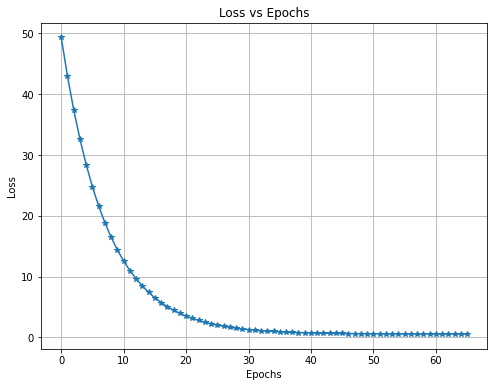

In [13]:
loss_epochs_plot(loss)

In [12]:
def loss_theta_plot(loss, theta):
    plt.figure(figsize=(8, 6))
    plt.plot(theta, loss, marker='*')
    plt.xlabel('theta')
    plt.ylabel('Loss')
    plt.grid()
    plt.show()

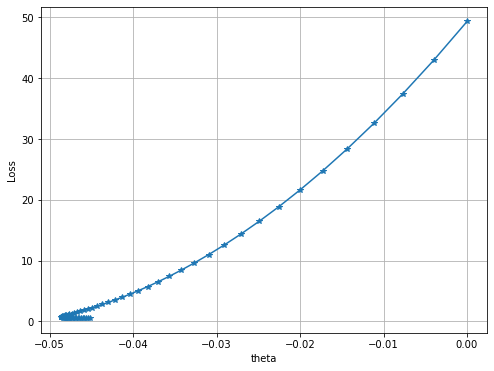

In [15]:
loss_theta_plot(loss, theta_0_arr)

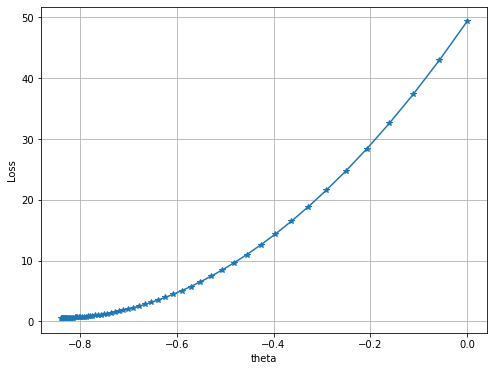

In [16]:
loss_theta_plot(loss, theta_1_arr)

In [13]:
def regression_lines(X, y_predict, y):
    y1 = np.array(y_predict).reshape((-1, len(X)))
    plt.figure(figsize=(8, 6))
    for line in range(y1.shape[0]):
        plt.plot(X, y1[line, :], color = 'red')
    plt.scatter(X, y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()
    plt.show()

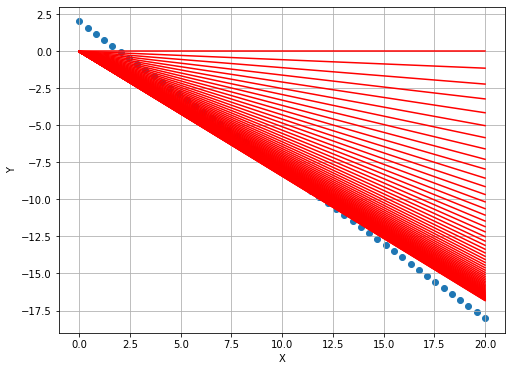

In [18]:
regression_lines(X, y_predict, y)

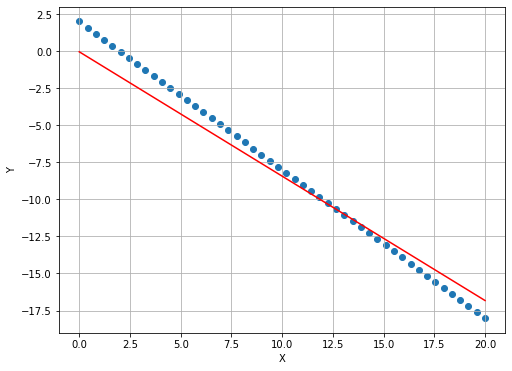

In [19]:
regression_lines(X, y_predict[-1], y)

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [32]:
def MomentumGD_singleVariable(X, y, learning_rate, gamma, max_iterations):
    theta_0 = 0
    theta_1 = 0
    i = 0
    v0 = 0
    v1 = 0
    loss = []
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    while i<max_iterations:
        print(f'****************** Iteration {i} *******************\n')

        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        # step2
        h_x = theta_0 + theta_1*X
        y_predict.append(h_x)
        print(f'h(x):{h_x}\n')
        
        # step3
        error_vector = h_x - y
        print(f'Error Vector:\n{error_vector}\n')
        error_norm = np.linalg.norm(error_vector, 2)
        j = error_norm**2 / (2*len(error_vector))
        loss.append(j)
        print(f'j = {j}\n')
                                              
        # step4                                                  
        d_theta_0 = error_vector.sum()/len(error_vector)
        d_theta_1 = (error_vector@X) /len(error_vector)
        Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
        print(f'Gradient Vector :\n {Gradient_Vector}\n')                 
        print(f'Gradient Vector Norm : {Gradient_Vector_Norm}\n')
        if Gradient_Vector_Norm < 0.01:                             
            break
        if i!=0 and (abs(loss[-2] - loss[-1]) < 0.001): 
            break
        
        # step5
        v0 = gamma*v0 + learning_rate*d_theta_0
        v1 = gamma*v1 + learning_rate*d_theta_1
        theta_0 = theta_0 - v0
        theta_1 = theta_1 - v1
        print(f'theta_0_new = {theta_0}')
        print(f'theta_1_new = {theta_1}\n')
        i = i + 1

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations\n')
    print(f'theta_0_opt = {theta_0}')
    print(f'theta_1_opt = {theta_1}\n')
    print(f'Error Vector:\n{error_vector}\n')
    print(f'Cost = {j}\n')
    print(f'h(x) = y_predict :\n{h_x}\n')
    print(f'y_actual :\n{y}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [33]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = MomentumGD_singleVariable(X, y, learning_rate=0.0005, gamma=0.5, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

theta_0_new = -0.004
theta_1_new = -0.057346

In [35]:
hx = theta_0 + theta_1 * X
hx

array([ -0.04735973,  -0.39150946,  -0.73565919,  -1.07980892,
        -1.42395865,  -1.76810838,  -2.11225811,  -2.45640784,
        -2.80055757,  -3.1447073 ,  -3.48885703,  -3.83300676,
        -4.17715649,  -4.52130622,  -4.86545595,  -5.20960568,
        -5.55375542,  -5.89790515,  -6.24205488,  -6.58620461,
        -6.93035434,  -7.27450407,  -7.6186538 ,  -7.96280353,
        -8.30695326,  -8.65110299,  -8.99525272,  -9.33940245,
        -9.68355218, -10.02770191, -10.37185164, -10.71600137,
       -11.0601511 , -11.40430083, -11.74845056, -12.09260029,
       -12.43675002, -12.78089975, -13.12504948, -13.46919921,
       -13.81334894, -14.15749868, -14.50164841, -14.84579814,
       -15.18994787, -15.5340976 , -15.87824733, -16.22239706,
       -16.56654679, -16.91069652])

In [36]:
r2_score(y,hx)

0.9687892837396442

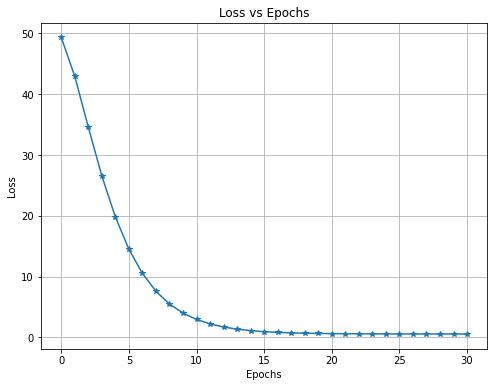

In [37]:
loss_epochs_plot(loss)

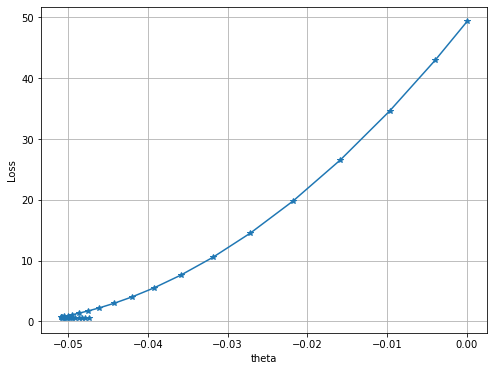

In [38]:
loss_theta_plot(loss, theta_0_arr)

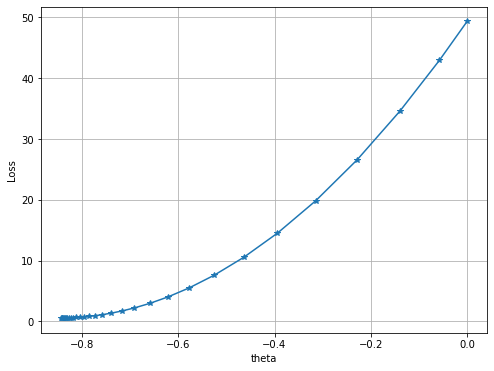

In [39]:
loss_theta_plot(loss, theta_1_arr)

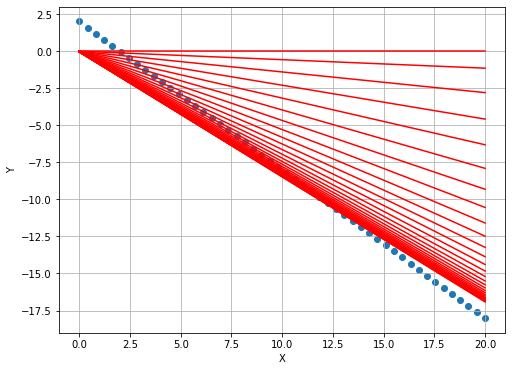

In [40]:
regression_lines(X, y_predict, y)

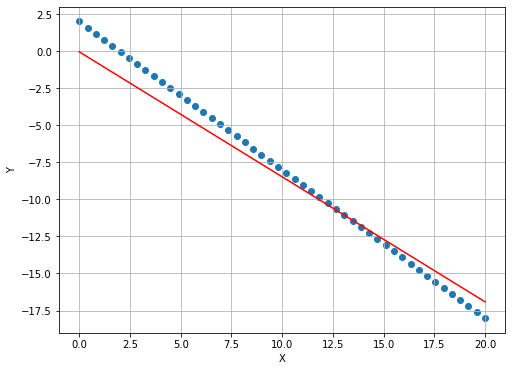

In [41]:
y_new = theta_0_arr[-1] + theta_1_arr[-1]*X
regression_lines(X, y_new, y)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [42]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = MomentumGD_singleVariable(X, y, learning_rate=0.0005, gamma=0, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

theta_0_new = -0.004
theta_1_new = -0.057346

In [43]:
hx = theta_0 + theta_1 * X
hx

array([ -0.04520484,  -0.38763135,  -0.73005787,  -1.07248438,
        -1.41491089,  -1.7573374 ,  -2.09976391,  -2.44219042,
        -2.78461693,  -3.12704345,  -3.46946996,  -3.81189647,
        -4.15432298,  -4.49674949,  -4.839176  ,  -5.18160252,
        -5.52402903,  -5.86645554,  -6.20888205,  -6.55130856,
        -6.89373507,  -7.23616158,  -7.5785881 ,  -7.92101461,
        -8.26344112,  -8.60586763,  -8.94829414,  -9.29072065,
        -9.63314717,  -9.97557368, -10.31800019, -10.6604267 ,
       -11.00285321, -11.34527972, -11.68770624, -12.03013275,
       -12.37255926, -12.71498577, -13.05741228, -13.39983879,
       -13.7422653 , -14.08469182, -14.42711833, -14.76954484,
       -15.11197135, -15.45439786, -15.79682437, -16.13925089,
       -16.4816774 , -16.82410391])

In [44]:
r2_score(y,hx)

0.9686158031920962

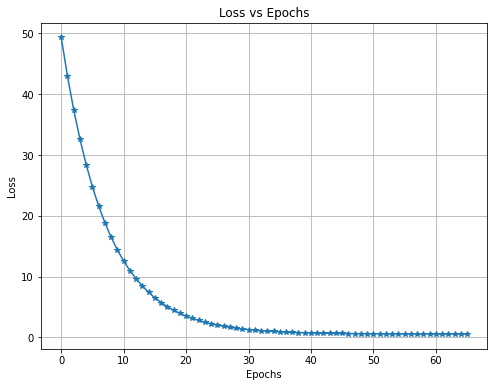

In [45]:
loss_epochs_plot(loss)

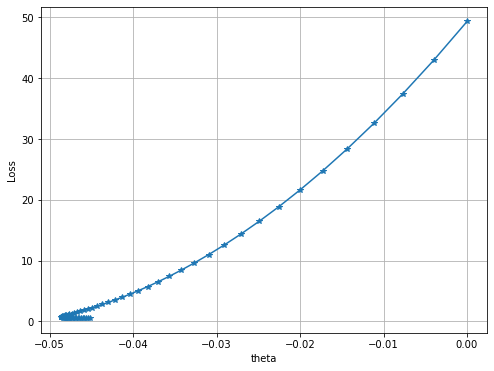

In [46]:
loss_theta_plot(loss, theta_0_arr)

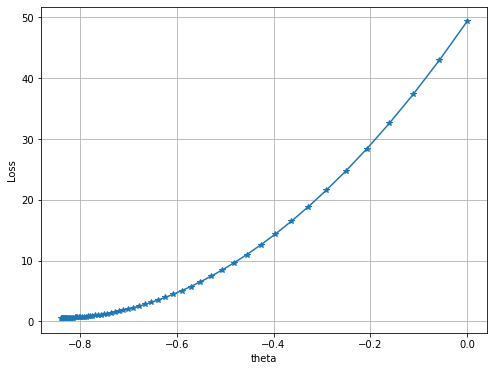

In [47]:
loss_theta_plot(loss, theta_1_arr)

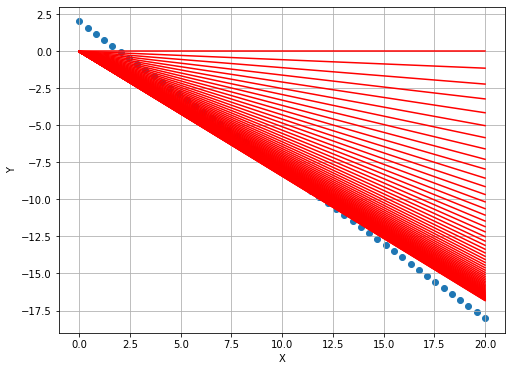

In [48]:
regression_lines(X, y_predict, y)

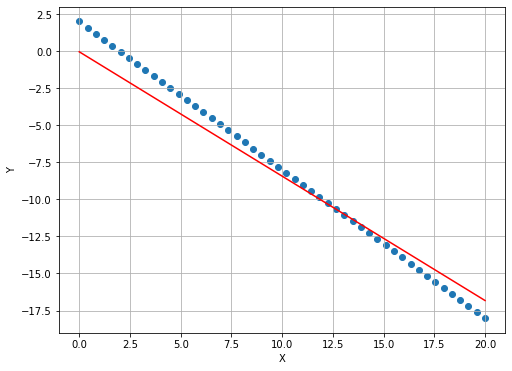

In [49]:
regression_lines(X, y_predict[-1], y)

In [50]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = MomentumGD_singleVariable(X, y, learning_rate=0.0005, gamma=0.9, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

theta_0_new = -0.004
theta_1_new = -0.057346

In [51]:
hx = theta_0 + theta_1 * X
hx

array([  0.11535974,  -0.23701107,  -0.58938189,  -0.9417527 ,
        -1.29412352,  -1.64649433,  -1.99886515,  -2.35123596,
        -2.70360678,  -3.05597759,  -3.40834841,  -3.76071922,
        -4.11309004,  -4.46546085,  -4.81783167,  -5.17020248,
        -5.5225733 ,  -5.87494411,  -6.22731493,  -6.57968574,
        -6.93205656,  -7.28442737,  -7.63679819,  -7.989169  ,
        -8.34153982,  -8.69391063,  -9.04628145,  -9.39865226,
        -9.75102308, -10.1033939 , -10.45576471, -10.80813553,
       -11.16050634, -11.51287716, -11.86524797, -12.21761879,
       -12.5699896 , -12.92236042, -13.27473123, -13.62710205,
       -13.97947286, -14.33184368, -14.68421449, -15.03658531,
       -15.38895612, -15.74132694, -16.09369775, -16.44606857,
       -16.79843938, -17.1508102 ])

In [52]:
r2_score(y,hx)

0.973589591111118

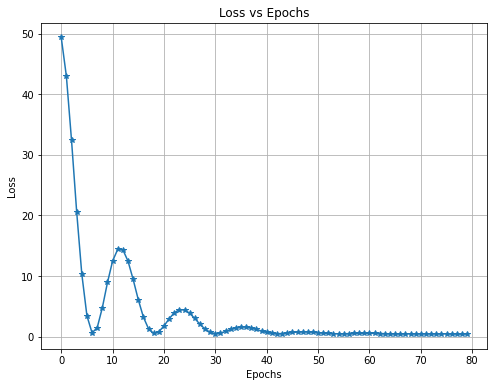

In [53]:
loss_epochs_plot(loss)

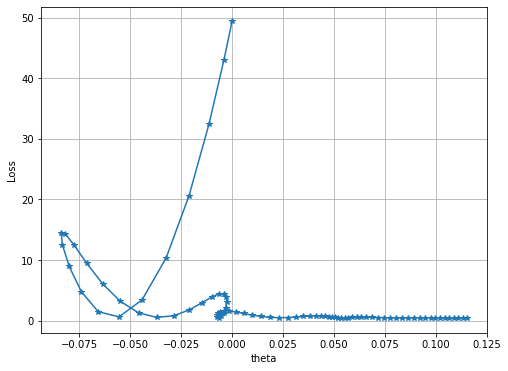

In [54]:
loss_theta_plot(loss, theta_0_arr)

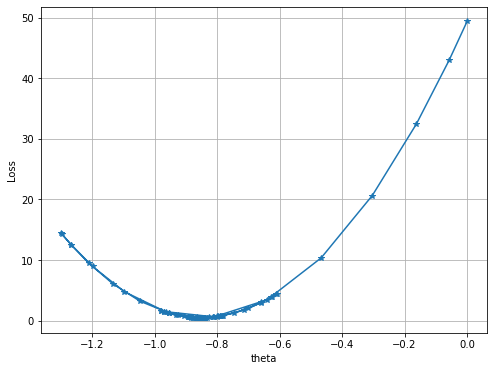

In [55]:
loss_theta_plot(loss, theta_1_arr)

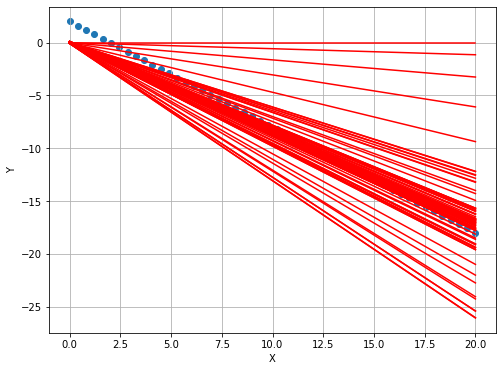

In [56]:
regression_lines(X, y_predict, y)

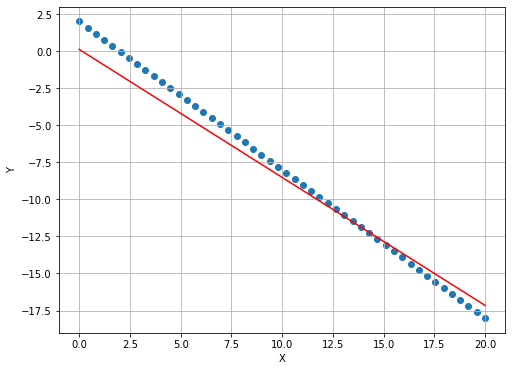

In [57]:
regression_lines(X, y_predict[-1], y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [58]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = MomentumGD_singleVariable(X, y, learning_rate=0.0005, gamma=0.89, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

theta_0_new = -0.004
theta_1_new = -0.057346

In [59]:
hx = theta_0 + theta_1 * X
hx

array([  0.07510911,  -0.27317264,  -0.62145439,  -0.96973613,
        -1.31801788,  -1.66629963,  -2.01458137,  -2.36286312,
        -2.71114487,  -3.05942662,  -3.40770836,  -3.75599011,
        -4.10427186,  -4.4525536 ,  -4.80083535,  -5.1491171 ,
        -5.49739885,  -5.84568059,  -6.19396234,  -6.54224409,
        -6.89052583,  -7.23880758,  -7.58708933,  -7.93537108,
        -8.28365282,  -8.63193457,  -8.98021632,  -9.32849806,
        -9.67677981, -10.02506156, -10.37334331, -10.72162505,
       -11.0699068 , -11.41818855, -11.76647029, -12.11475204,
       -12.46303379, -12.81131554, -13.15959728, -13.50787903,
       -13.85616078, -14.20444252, -14.55272427, -14.90100602,
       -15.24928777, -15.59756951, -15.94585126, -16.29413301,
       -16.64241475, -16.9906965 ])

In [60]:
r2_score(y,hx)

0.972435565060376

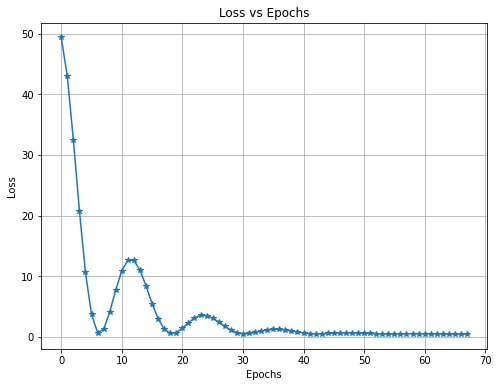

In [61]:
loss_epochs_plot(loss)

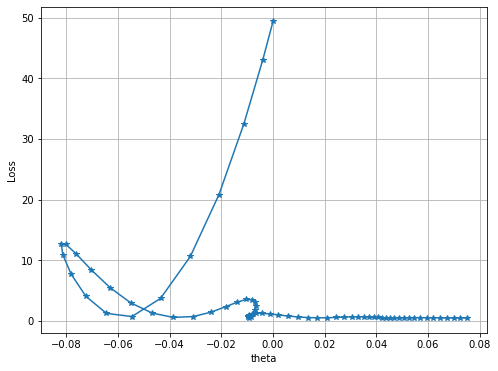

In [62]:
loss_theta_plot(loss, theta_0_arr)

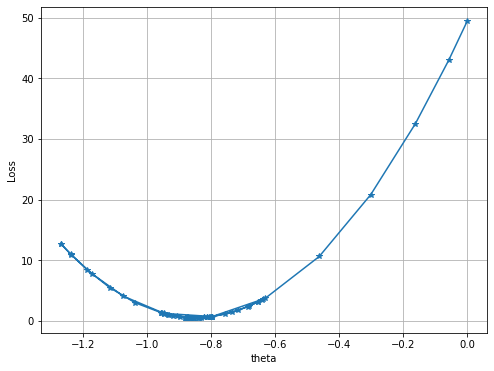

In [63]:
loss_theta_plot(loss, theta_1_arr)

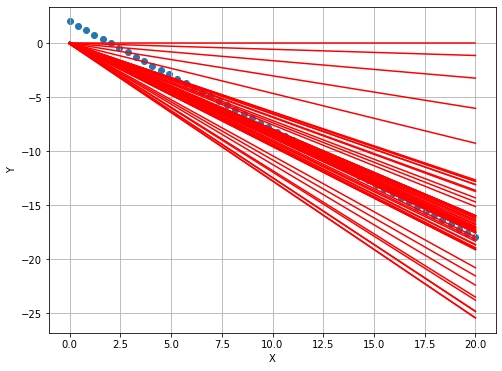

In [64]:
regression_lines(X, y_predict, y)

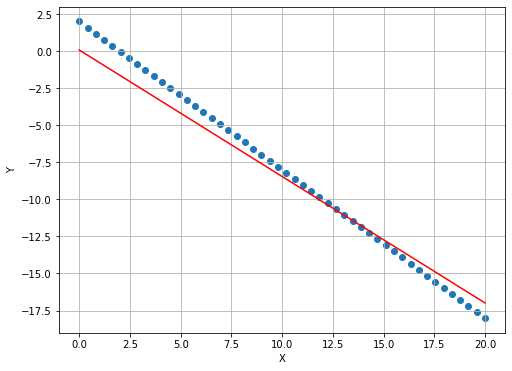

In [65]:
regression_lines(X, y_predict[-1], y)

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

In [70]:
def NAG_singleVariable(X, y, learning_rate, gamma, max_iterations):
    theta_0 = 0
    theta_1 = 0
    i = 0
    v0 = 0
    v1 = 0
    loss = []
    y_predict = []                                           
    theta_0_arr = []
    theta_1_arr = []
    while i<max_iterations:
        print(f'****************** Iteration {i} *******************\n')

        theta_0_arr.append(theta_0)
        theta_1_arr.append(theta_1)
        
        # step2
        h_x = theta_0 + theta_1*X
        y_predict.append(h_x)
        print(f'h(x):{h_x}\n')
        
        # step3
        error_vector = h_x - y
        print(f'Error Vector:\n{error_vector}\n')
        error_norm = np.linalg.norm(error_vector, 2)
        j = error_norm**2 / (2*len(error_vector))
        loss.append(j)
        print(f'j = {j}\n')
                                              
        # step4                                                  
        d_theta_0 = error_vector.sum()/len(error_vector)
        d_theta_1 = (error_vector@X) /len(error_vector)
        Gradient_Vector = np.array([[d_theta_0], [d_theta_1]])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
        print(f'Gradient Vector :\n {Gradient_Vector}\n')                 
        print(f'Gradient Vector Norm : {Gradient_Vector_Norm}\n')
        if Gradient_Vector_Norm < 0.01:                             
            break
        if i!=0 and (abs(loss[-2] - loss[-1]) < 0.001): 
            break
        
        theta_tmp0 = theta_0 - gamma*v0
        theta_tmp1 = theta_1 - gamma*v1
        
        #gradient theta tmp
        h_x = theta_tmp0 + theta_tmp1*X`
#         y_predict.append(h_x)
#         print(f'h(x):{h_x}\n')
    
        error_vector = h_x - y
        print(f'Error Vector:\n{error_vector}\n')
        error_norm = np.linalg.norm(error_vector, 2)
#         j = error_norm**2 / (2*len(error_vector))
#         loss.append(j)
        print(f'j = {j}\n')
                                                                                              
        d_theta_tmp_0 = error_vector.sum()/len(error_vector)
        d_theta_tmp_1 = (error_vector@X) /len(error_vector)
        Gradient_Vector = np.array([[d_theta_tmp_0], [d_theta_tmp_1]])
        Gradient_Vector_Norm = np.linalg.norm(Gradient_Vector, 2)
        
        theta_0 = theta_tmp0 - learning_rate*Gradient_Vector[0]
        theta_1 = theta_tmp1 - learning_rate*Gradient_Vector[1]
        
        v0 = gamma*v0 + learning_rate*Gradient_Vector[0]
        v1 = gamma*v1 + learning_rate*Gradient_Vector[1]
        
        print(f'theta_0_new = {theta_0}')
        print(f'theta_1_new = {theta_1}\n')
        i = i + 1

    print(f'****************** Training Report ********************\n')
    print(f'Gradient Descent converged after {i-1} iterations\n')
    print(f'theta_0_opt = {theta_0}')
    print(f'theta_1_opt = {theta_1}\n')
    print(f'Error Vector:\n{error_vector}\n')
    print(f'Cost = {j}\n')
    print(f'h(x) = y_predict :\n{h_x}\n')
    print(f'y_actual :\n{y}\n')
    
    return theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [71]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = NAG_singleVariable(X, y, learning_rate=0.0005, gamma=0.9, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

Error Vector:
[-2.         -1.59183673 -1.18

In [73]:
hx = theta_0 + theta_1 * X
hx

array([  0.02850943,  -0.31859325,  -0.66569593,  -1.01279861,
        -1.3599013 ,  -1.70700398,  -2.05410666,  -2.40120934,
        -2.74831202,  -3.09541471,  -3.44251739,  -3.78962007,
        -4.13672275,  -4.48382543,  -4.83092812,  -5.1780308 ,
        -5.52513348,  -5.87223616,  -6.21933884,  -6.56644153,
        -6.91354421,  -7.26064689,  -7.60774957,  -7.95485225,
        -8.30195494,  -8.64905762,  -8.9961603 ,  -9.34326298,
        -9.69036566, -10.03746835, -10.38457103, -10.73167371,
       -11.07877639, -11.42587907, -11.77298176, -12.12008444,
       -12.46718712, -12.8142898 , -13.16139249, -13.50849517,
       -13.85559785, -14.20270053, -14.54980321, -14.8969059 ,
       -15.24400858, -15.59111126, -15.93821394, -16.28531662,
       -16.63241931, -16.97952199])

In [74]:
r2_score(y,hx)

0.971103130756324

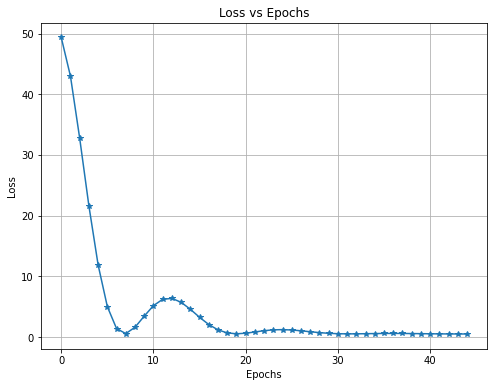

In [75]:
loss_epochs_plot(loss)

C:\Users\Sara Galal\miniconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


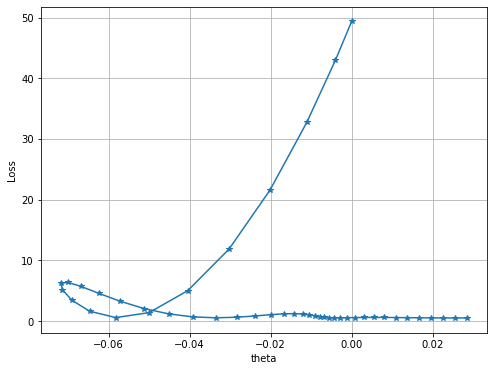

In [76]:
loss_theta_plot(loss, theta_0_arr)

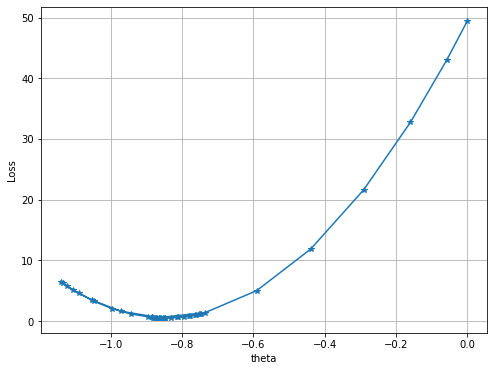

In [77]:
loss_theta_plot(loss, theta_1_arr)

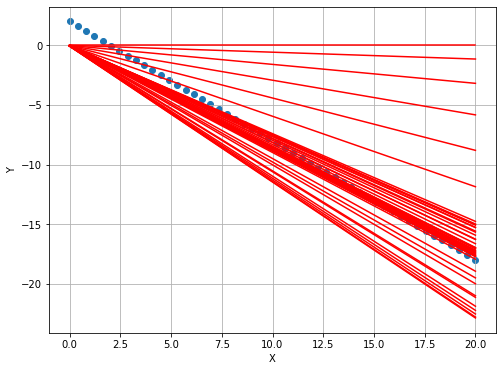

In [78]:
regression_lines(X, y_predict, y)

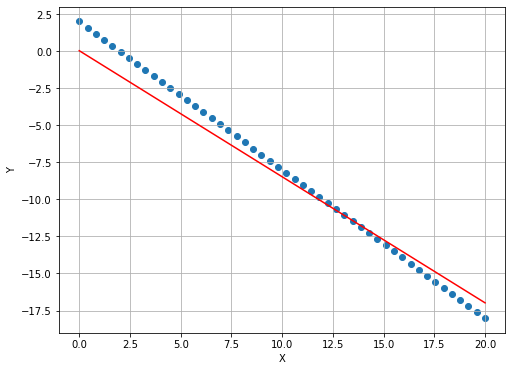

In [79]:
regression_lines(X, y_predict[-1], y)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [80]:
theta_0_arr, theta_1_arr, loss, y_predict, theta_0, theta_1 = NAG_singleVariable(X, y, learning_rate=0.0005, gamma=0.89, max_iterations=300)

****************** Iteration 0 *******************

h(x):[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.346938775510196

Gradient Vector :
 [[  8.        ]
 [114.69387755]]

Gradient Vector Norm : 114.97254258164628

Error Vector:
[-2.         -1.59183673 -1.18

In [81]:
hx = theta_0 + theta_1 * X
hx

array([-6.09167573e-03, -3.56000947e-01, -7.05910219e-01, -1.05581949e+00,
       -1.40572876e+00, -1.75563803e+00, -2.10554731e+00, -2.45545658e+00,
       -2.80536585e+00, -3.15527512e+00, -3.50518439e+00, -3.85509366e+00,
       -4.20500293e+00, -4.55491221e+00, -4.90482148e+00, -5.25473075e+00,
       -5.60464002e+00, -5.95454929e+00, -6.30445856e+00, -6.65436784e+00,
       -7.00427711e+00, -7.35418638e+00, -7.70409565e+00, -8.05400492e+00,
       -8.40391419e+00, -8.75382347e+00, -9.10373274e+00, -9.45364201e+00,
       -9.80355128e+00, -1.01534606e+01, -1.05033698e+01, -1.08532791e+01,
       -1.12031884e+01, -1.15530976e+01, -1.19030069e+01, -1.22529162e+01,
       -1.26028255e+01, -1.29527347e+01, -1.33026440e+01, -1.36525533e+01,
       -1.40024625e+01, -1.43523718e+01, -1.47022811e+01, -1.50521904e+01,
       -1.54020996e+01, -1.57520089e+01, -1.61019182e+01, -1.64518274e+01,
       -1.68017367e+01, -1.71516460e+01])

In [82]:
r2_score(y,hx)

0.9699718983158406

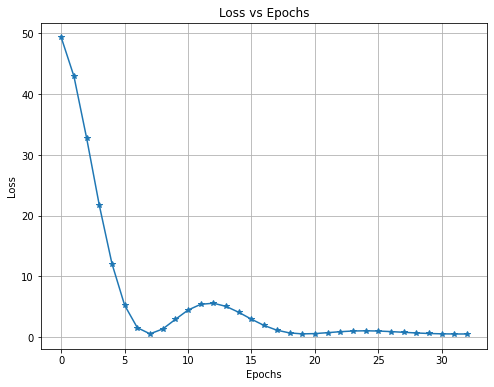

In [83]:
loss_epochs_plot(loss)

C:\Users\Sara Galal\miniconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


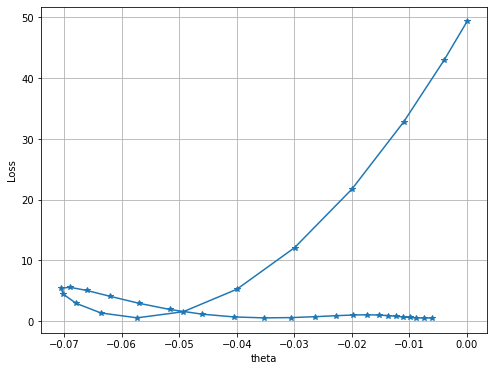

In [84]:
loss_theta_plot(loss, theta_0_arr)

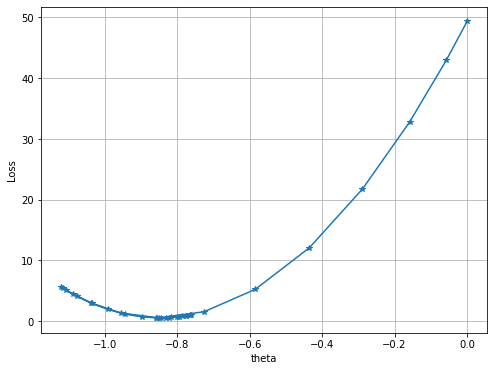

In [85]:
loss_theta_plot(loss, theta_1_arr)

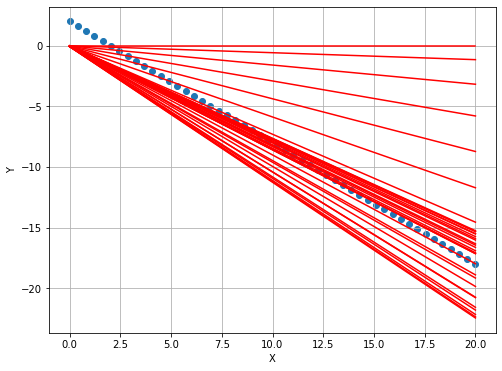

In [86]:
regression_lines(X, y_predict, y)

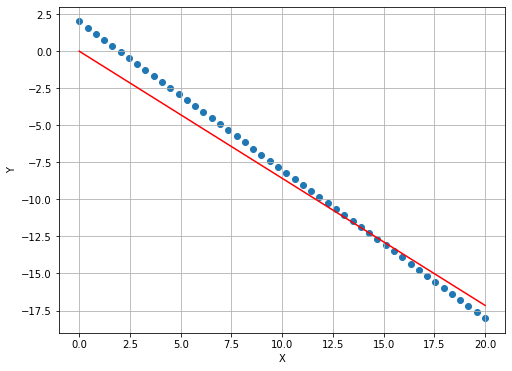

In [87]:
regression_lines(X, y_predict[-1], y)